In [1]:
# Import libraries
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = nc.Dataset('ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-20070101000000-fv05.2.nc', 'r') # reading in data
sm = data['sm'][:].data; print(sm.shape)
sm = sm[0]

(1, 720, 1440)


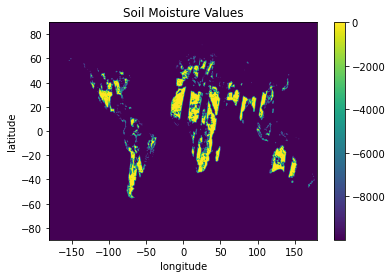

In [3]:
x = data['lon'][:]
y = data['lat'][:]
X, Y = np.meshgrid(x, y)
plt.imshow(sm, extent=(np.amin(X), np.amax(X), np.amin(Y), np.amax(Y)),aspect='auto') # heatmap
plt.ylabel("latitude")
plt.xlabel("longitude")
plt.title('Soil Moisture Values')
plt.colorbar();

In [4]:
X_flat = X.reshape(-1, 1) # flattening all the relevant arrays for data frame
Y_flat = Y.reshape(-1, 1)
sm_flat = sm.reshape(-1, 1)
sm_arr = np.hstack((X_flat, Y_flat, sm_flat))
sm_df = pd.DataFrame(sm_arr, columns = ['lon', 'lat', 'sm']); print(sm_df.shape)

(1036800, 3)


In [5]:
# function to extract soil moistures at a given location
def get_sm(lon, lat, df):
    return(df[(df.lon == lon) & (df.lat == lat)].values[0][-1])
print("soil moisture at (-179.875, 89.875):", get_sm(lon = -179.875, lat = 89.875, df = sm_df))
print("soil moisture at (25.625, 71.125):", get_sm(lon = 25.625, lat = 71.125, df = sm_df))

soil moisture at (-179.875, 89.875): -9999.0
soil moisture at (25.625, 71.125): 0.2643064


In [6]:
# this will grab the relevant locations where there are valid soil moisture values
sm_nonnegative = sm_df[sm_df.sm >= 0]
print(sm_nonnegative.head())

           lon     lat        sm
108822  25.625  71.125  0.264306
149206  41.625  64.125  0.178955
152077  39.375  63.625  0.182287
153516  39.125  63.375  0.191877
154968  42.125  63.125  0.222211
